<a href="https://colab.research.google.com/github/benject/deep_learning/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

logistic python implement

In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-


import numpy as np

def sigmoid(z):

  '''sigmoid 激活函数'''

  return(1.0/(1.0 + np.exp(-z)))


def loss( real_result , predict_result):

  '''损失函数'''

  result = -( real_result*np.log(predict_result) + (1 - real_result)*np.log(1-predict_result))
  return result

def gradient_w(input,real_result,predict_result):

  '''
  梯度下降
  第一步 令 y = loss（a） 对损失函数的求导 dy/da 的结果是 -y/a + (1-y)/(1-a)
  计算过程参见 https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17

  第二步 令 a = sigmoid（z） 对sigmoid函数求导 da/dz 的结果是 a(1-a)
  计算过程参见 https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e

  第三步 根据链式求导法则 dydz = dy/da * da/dz = (-y/a + (1-y)/(1-a)) * a(1-a) = -y(1-a) + a(1-y) = -y + ay + a - ay = a - y

  第四步 令 z = w1x1 + w2x2 + b 对函数求w1的偏导数 dz/dw1 = x1 以此类推

  那么： dy/dw1 = dz * dz/dw1 = x1 * (a - y) 

  可以发现 由于精妙的激活函数和损失函数的设计，预测值对参数值的梯度 就是 预测值与真值的差 再乘以输入
  '''
  
  return( input *(predict_result - real_result) )

def gradient_b(real_result,predict_result):    
  return( predict_result - real_result )

class MyNeuron:

  def __init__(self,w,b):
    self.w = w
    self.b = b
    self.learning_rate = 1

    self.lr_w = 0  ##ada learning rate 自适应的学习率 可以极大提高学习效率
    self.lr_b = 0  ##ada learning rate 自适应的学习率 可以极大提高学习效率

  def forward(self,x):
    z = np.dot(self.w,x) + b
    return sigmoid(z)

  def update_w(self,dw):
    self.lr_w = self.lr_w + dw**2 ##ada learning rate 自适应的学习率 可以极大提高学习效率
    self.w = self.w - self.learning_rate / np.sqrt(self.lr_w) * dw ##ada learning rate 自适应的学习率 可以极大提高学习效率
  
  def update_b(self,db):
    self.lr_b = self.lr_b + db**2 ##ada learning rate 自适应的学习率 可以极大提高学习效率
    self.b = self.b - self.learning_rate / np.sqrt(self.lr_b) * db ##ada learning rate 自适应的学习率 可以极大提高学习效率

In [3]:
#随机初始化权重 和 偏置
w = np.array([0.35,0.45])
b = 1.31

#实例化一个神经元
neu = MyNeuron (w.T,b)

#填充数据
X = np.zeros((600,2))
Y = np.zeros((600,1))

for i in range(300):

  X[i][0] = np.random.uniform() * 0.1 + 1.8
  X[i][1] = np.random.uniform() * 0.001 + 0.085
  Y[i] = 1.0

for i in range(300):

  X[300+i][1] = np.random.uniform() * 0.1 + 1.5
  X[300+i][1] = np.random.uniform() * 0.001 + 0.045
  Y[300+i] = 0.0

[[  8.26230239 -78.37364811]]
[-77.17496574]


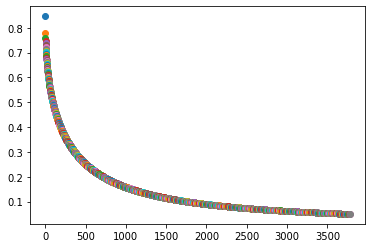

In [4]:
import matplotlib.pyplot as plt

y = 0 
dw1 = 0 
dw2 = 0
db = 0
j = 0

for e in range(10000):

  for i in range(600):

    y = neu.forward(X[i])
    dw1 += gradient_w(X[i][0],Y[i],y)
    dw2 += gradient_w(X[i][1],Y[i],y)
    db += gradient_b(Y[i],y)
    j += loss(Y[i],y)

  dw1 /= 600
  dw2 /= 600
  db /= 600
  j /= 600

  neu.update_w(np.array([dw1,dw2]).T)
  neu.update_b(np.array(db))


    
  plt.scatter(e,j)

  #print(j)
  if(j<0.05):
    break
    





print(neu.w)
print(neu.b)

  

In [5]:

test = X[400]
neu.forward(test)



array([0.09447124])

In [6]:
test1  = X[35]
neu.forward(test1)

array([0.99996675])